# Analysis

In [ ]:
import pandas as pd

df = pd.read_csv("../results/cluster_6.csv")
df

,dataset,backend,estimators,max_depth,accuracy,train_time,predict_time,threads,nodes
0,magic,seq,32,0,0.998883,12321.900,53.91730,1,1
1,magic,omp,32,0,0.999080,6373.100,30.28640,2,1
2,magic,ff,32,0,0.999146,6560.440,37.69060,2,1
3,magic,omp,32,0,0.998620,3275.710,19.51880,4,1
4,magic,ff,32,0,0.998751,3371.150,23.79060,4,1
5,magic,omp,32,0,0.998948,1680.040,10.40690,8,1
6,magic,ff,32,0,0.999080,1655.670,14.72960,8,1
7,magic,omp,32,0,0.999146,881.492,6.10195,16,1
8,magic,ff,32,0,0.999146,838.353,12.14960,16,1
9,magic,omp,32,0,0.998751,642.148,5.80243,32,1


In [ ]:
df = df[df["estimators"] == 32].sort_values(by=["threads", "backend"])
df = df[["train_time", "threads", "backend"]]
df

,train_time,threads,backend
22,48969.30,1,seq
24,25832.10,2,ff
23,26483.30,2,omp
26,13439.00,4,ff
25,12953.50,4,omp
28,6576.44,8,ff
27,6611.87,8,omp
30,3376.23,16,ff
29,3306.25,16,omp
32,2518.64,32,ff


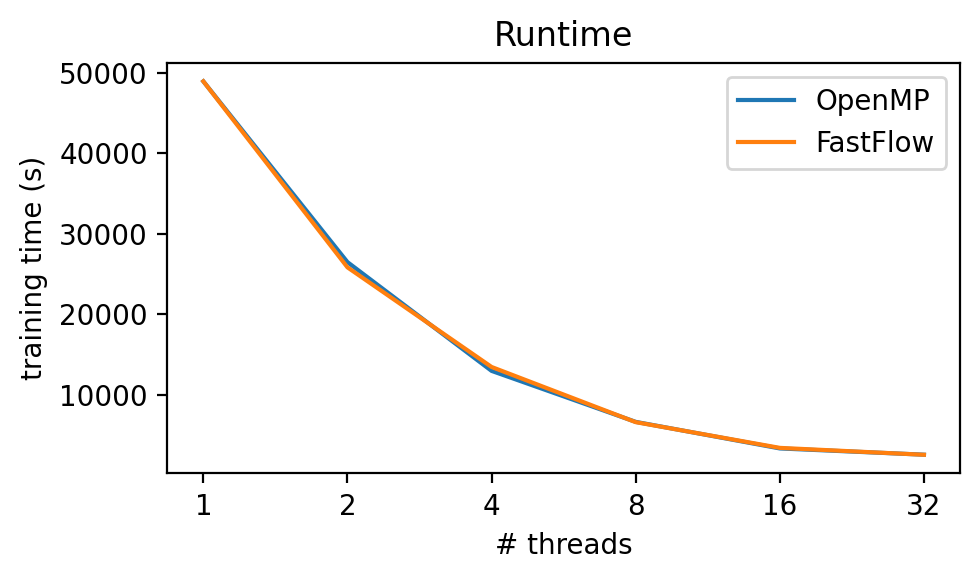

In [ ]:
import matplotlib.pyplot as plt


omp = df[(df["backend"] == "omp") | (df["backend"] == "seq")]
ff = df[(df["backend"] == "ff") | (df["backend"] == "seq")]

plt.figure(figsize=(5, 3), dpi=200)
plt.title("Runtime")
plt.plot(omp["threads"], omp["train_time"], label="OpenMP")
plt.plot(ff["threads"], ff["train_time"], label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("training time (s)")
plt.legend()
plt.tight_layout()
plt.show()

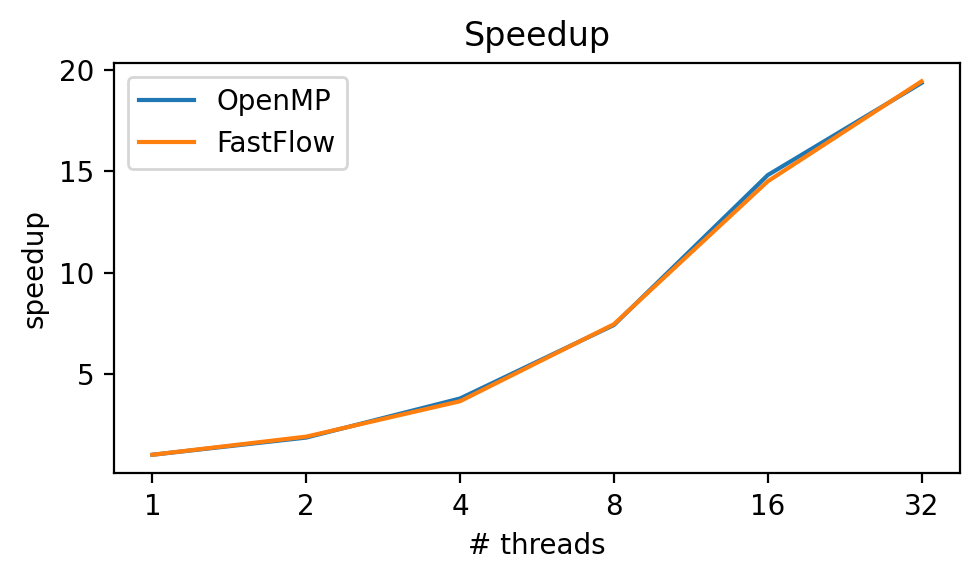

In [ ]:
omp_s = (
    df[df["backend"] == "seq"]["train_time"].to_numpy() / omp["train_time"].to_numpy()
)
ff_s = df[df["backend"] == "seq"]["train_time"].to_numpy() / ff["train_time"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Speedup")
plt.plot(omp["threads"], omp_s, label="OpenMP")
plt.plot(ff["threads"], ff_s, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("speedup")
plt.legend()
plt.tight_layout()
plt.show()

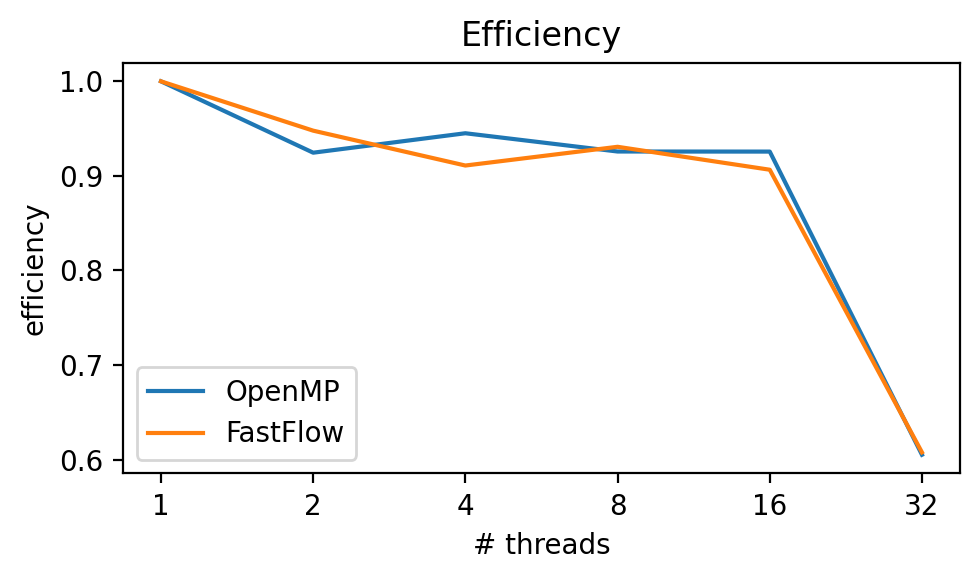

In [ ]:
omp_e = omp_s / omp["threads"].to_numpy()
ff_e = ff_s / ff["threads"].to_numpy()


plt.figure(figsize=(5, 3), dpi=200)
plt.title("Efficiency")
plt.plot(omp["threads"], omp_e, label="OpenMP")
plt.plot(ff["threads"], ff_e, label="FastFlow")

plt.xscale("log", base=2)
ticks = [1, 2, 4, 8, 16, 32]
plt.xticks(ticks, [str(i) for i in ticks])
plt.xlabel(r"# threads")
plt.ylabel("efficiency")
plt.legend()
plt.tight_layout()
plt.show()
